In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model

In [27]:
np.random.seed(0)

In [28]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

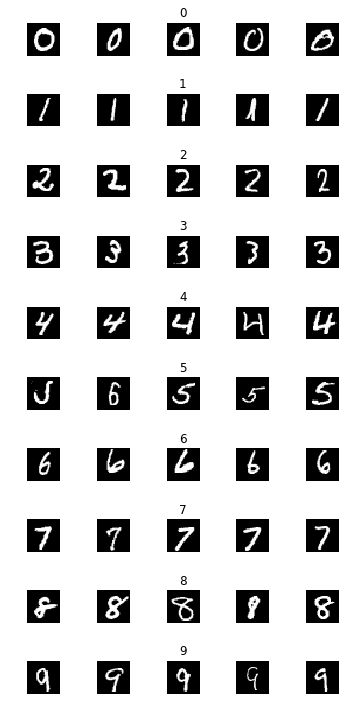

In [29]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


<Figure size 864x288 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Distribution of the train dataset')

Text(0.5, 0, 'Class number')

Text(0, 0.5, 'Number of images')

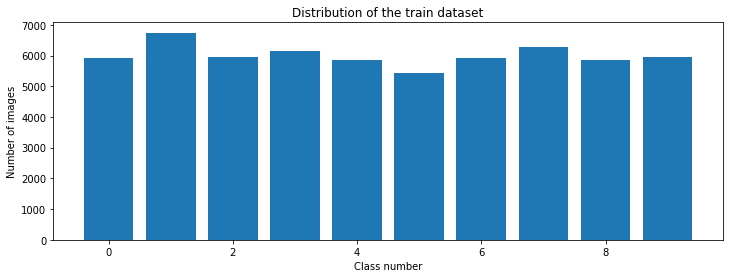

In [30]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [31]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [32]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [33]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

In [34]:
history=model.fit(X_train, y_ train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s - loss: 0.2429 - acc: 0.9233 - val_loss: 0.0489 - val_acc: 0.9853
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.0675 - acc: 0.9795 - val_loss: 0.0408 - val_acc: 0.9870
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.0603 - acc: 0.9815 - val_loss: 0.0449 - val_acc: 0.9855
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.0527 - acc: 0.9836 - val_loss: 0.0412 - val_acc: 0.9882
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.0448 - acc: 0.9865 - val_loss: 0.0354 - val_acc: 0.9902
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.0409 - acc: 0.9876 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.0352 - acc: 0.9890 - val_loss: 0.0428 - val_acc: 0.9873
Epoch 8/10
54000/54000 [==============================] - 1s -

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s - loss: 0.2423 - acc: 0.9241 - val_loss: 0.0484 - val_acc: 0.9857
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.0694 - acc: 0.9784 - val_loss: 0.0393 - val_acc: 0.9872
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.0625 - acc: 0.9804 - val_loss: 0.0409 - val_acc: 0.9883
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.0473 - acc: 0.9854 - val_loss: 0.0349 - val_acc: 0.9902
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.0392 - acc: 0.9874 - val_loss: 0.0333 - val_acc: 0.9885
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0365 - val_acc: 0.9910
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0414 - val_acc: 0.9872
Epoch 8/10
54000/54000 [==============================] - 1s -

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'epoch')

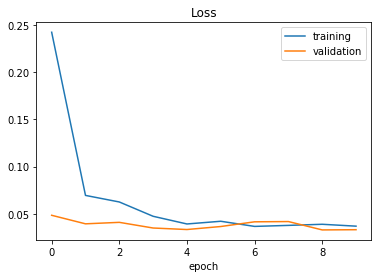

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'epoch')

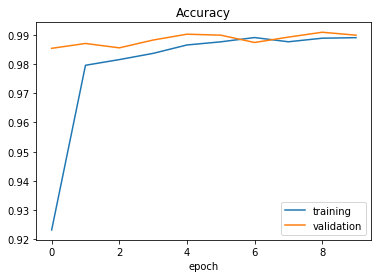

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test, y_test, verbose=0)

Test score: 0.03741286775930839
Test accuracy: 0.9893


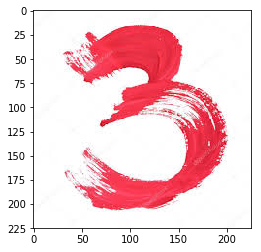

In [36]:
print('Test score:', score[0])
print('Test accuracy:', score[1])
#predict internet number
import requests
from PIL import Image
# url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

r = requests.get(url, stream=True)
img = Image.open("images.jpg")
plt.imshow(img, cmap=plt.get_cmap('gray'))

(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s
predicted digit: [3]


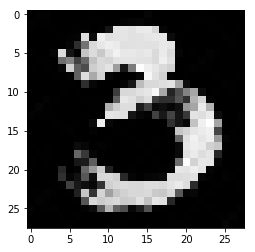

In [37]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

In [38]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


<Figure size 720x432 with 0 Axes>

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

(-0.5, 23.5, 23.5, -0.5)

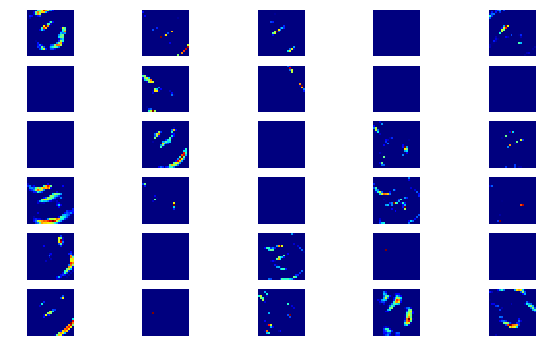

In [39]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

<Figure size 720x432 with 0 Axes>

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

(-0.5, 9.5, 9.5, -0.5)

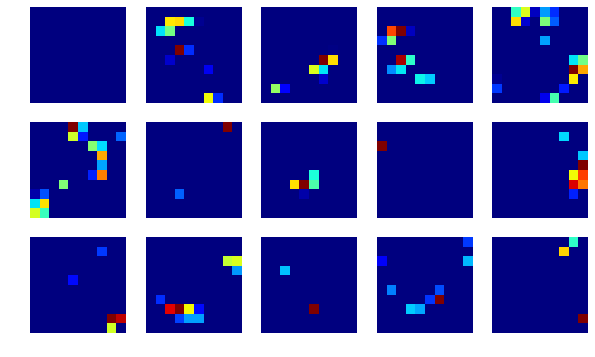

In [44]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')